# Movie Imdb Rating Prediction
The Model is capable to predict Imdb Movie rating. Model is based on a Supervised Learning technique.
Model is trained over a Imdb Movie Dataset downloaded from Imdb official website.

Operations performed on dataset.
 
Data Cleaning
        
        *Remove unwanted columns from data
        *Checking for null Values
        *SimpleImputer used to fill Null values
        *Data filteration

Encoding Dataset

        *convert string features( genres, langauge) using One_hot_encoding
        *Standard Scaling is used to scale data

By using train_test_split splitting data into train or test set

Models which are tested:
         
         *Random forest  
         *Decision Tree 
         *Linear Regression
Model Evaluation: All models evaluation result are recorded.

          *Mean Absolute Error 
          *Mean Squared Error
          *Root Mean Squared Error

Best Evaluation Result : Random Forest regressor

Shows Graphs Between predicted and Actual values using Seaborn or matplotlib.

Saving the Model Using Joblib.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Movie_data=pd.read_csv("C:\\Users\\91701\\Desktop\\movie_data.csv")
Movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,Unnamed: 29
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,NaN
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,NaN
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN,NaN
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN,NaN
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,NaN


In [3]:
Movie_data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,Unnamed: 29
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000,0.0,0.0
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505,NaN,NaN
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110,NaN,NaN
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,NaN,NaN
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000,NaN,NaN
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000,NaN,NaN
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000,NaN,NaN
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000,NaN,NaN


In [4]:
Movie_data.shape

(5043, 30)

In [5]:
Movie_data.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
Unnamed: 28                     0
Unnamed: 29   

In [6]:
Movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'Unnamed: 28',
       'Unnamed: 29'],
      dtype='object')

In [7]:
copied_data=Movie_data.copy()

In [8]:
Movie_data.drop(["Unnamed: 28","Unnamed: 29","color","director_name","actor_2_name","actor_1_name","actor_3_name","country","movie_imdb_link","movie_title","plot_keywords","content_rating"],axis=1,inplace=True)

In [9]:
Movie_data.shape

(5043, 18)

In [10]:
Movie_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,0.0,3054.0,English,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,0.0,1238.0,English,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,1.0,994.0,English,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,0.0,2701.0,English,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,Documentary,8,143,0.0,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [11]:
Movie_data.count()

num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
num_voted_users              5043
cast_total_facebook_likes    5043
facenumber_in_poster         5030
num_user_for_reviews         5022
language                     5031
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

In [12]:
Movie_data.isnull().sum()

num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
genres                         0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
language                      12
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [13]:
Movie_data["language"].unique()

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'None', 'Hungarian',
       'Portuguese', 'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada',
       'Zulu', 'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian',
       'Urdu', 'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili'],
      dtype=object)

In [14]:
Movie_data["genres"].unique()

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller', 'Documentary',
       'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
       'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Adventure|Animation|Comedy|Family|Fantasy',
       'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
       'Action|Adventure|Horror|Sci-Fi|Thriller',
       'Adventure|Animation|Family|Sci-Fi',
       'Action|Comedy|Crime|Thrille

# Encode Dataset

In [15]:
encoded_df = pd.get_dummies(data=Movie_data, columns=['genres', 'language'])
encoded_df.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews',
       ...
       'language_Slovenian', 'language_Spanish', 'language_Swahili',
       'language_Swedish', 'language_Tamil', 'language_Telugu',
       'language_Thai', 'language_Urdu', 'language_Vietnamese',
       'language_Zulu'],
      dtype='object', length=977)

In [16]:
encoded_df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,language_Slovenian,language_Spanish,language_Swahili,language_Swedish,language_Tamil,language_Telugu,language_Thai,language_Urdu,language_Vietnamese,language_Zulu
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0,0,0,0,0,0,0,0,0,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0,0,0,0,0,0,0,0,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0,0,0,0,0,0,0,0,0,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0


# Checking Correlation

In [17]:
corr_matrix=encoded_df.corr()
corr_matrix["imdb_score"].sort_values(ascending=False)

imdb_score                1.000000
num_voted_users           0.410965
num_critic_for_reviews    0.305303
num_user_for_reviews      0.292475
duration                  0.261662
                            ...   
genres_Comedy|Romance    -0.082417
genres_Horror            -0.095586
genres_Comedy            -0.108249
language_English         -0.144733
title_year               -0.209167
Name: imdb_score, Length: 977, dtype: float64

# Filling Null Values

In [18]:
from sklearn.impute import SimpleImputer
Imputer=SimpleImputer(strategy="median")
Imputer.fit(encoded_df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [19]:
Imputer.statistics_.shape

(977,)

In [20]:
tr_data=Imputer.transform(encoded_df)

In [21]:
data_tr=pd.DataFrame(tr_data,columns=encoded_df.columns)
data_tr.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,language_Slovenian,language_Spanish,language_Swahili,language_Swedish,language_Tamil,language_Telugu,language_Thai,language_Urdu,language_Vietnamese,language_Zulu
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,...,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,139.894904,107.188578,673.362086,643.762344,6552.312711,4.444529e+07,8.366816e+04,9699.063851,1.370216,272.284553,...,0.000198,0.007932,0.000198,0.000991,0.000198,0.000198,0.000595,0.000198,0.000198,0.000397
std,121.034214,25.160972,2785.636586,1661.341930,15011.762327,6.277281e+07,1.384853e+05,18163.799124,2.011066,377.269873,...,0.014082,0.088715,0.014082,0.031475,0.014082,0.014082,0.024385,0.014082,0.014082,0.019913
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,93.000000,7.000000,134.500000,615.500000,8.460992e+06,8.593500e+03,1411.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,194.000000,118.000000,189.000000,635.000000,11000.000000,5.135707e+07,9.630900e+04,13756.500000,2.000000,324.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking Null Values

In [22]:
data_tr.isnull().sum()

num_critic_for_reviews     0
duration                   0
director_facebook_likes    0
actor_3_facebook_likes     0
actor_1_facebook_likes     0
                          ..
language_Telugu            0
language_Thai              0
language_Urdu              0
language_Vietnamese        0
language_Zulu              0
Length: 977, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5BEA30E88>,
      dtype=object)

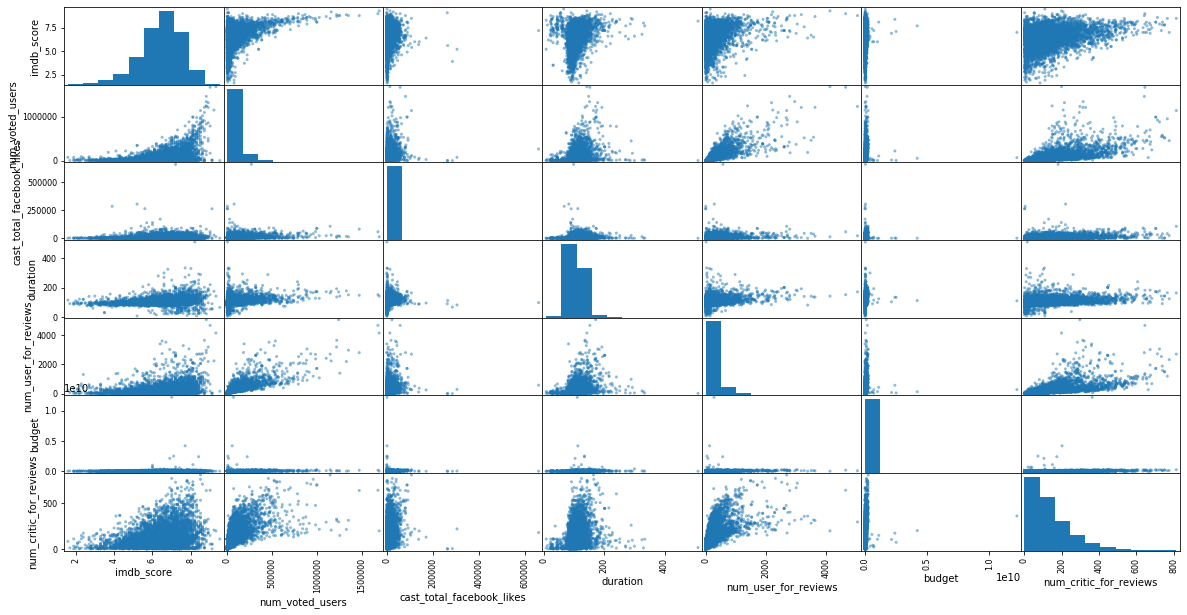

In [23]:
from pandas.plotting import scatter_matrix
attributes=["imdb_score","num_voted_users","cast_total_facebook_likes","duration","num_user_for_reviews","budget","num_critic_for_reviews"]
scatter_matrix(data_tr[attributes],figsize=(20,10))

In [24]:
Y=data_tr["imdb_score"]

In [25]:
data_tr.drop("imdb_score",axis=1,inplace=True)

In [26]:
X=data_tr

# Pipeline

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
                ("std_scaler",StandardScaler()),
])


In [28]:
X_tr=my_pipeline.fit_transform(X)

In [29]:
X_tr.shape

(5043, 976)

# Splitting Dataset

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_tr,Y,test_size=0.2,random_state=42)

In [31]:
print(f"Rows in X_train set:{len(X_train)}\nRows in X_test:{len(X_test)}\nRows in Y_train set:{len(Y_train)}\nRows in Y_test set:{len(X_test)}\n")

Rows in X_train set:4034
Rows in X_test:1009
Rows in Y_train set:4034
Rows in Y_test set:1009



# Model Selection

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model=LinearRegression()
#model=DecisionTreeRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
Y_predict=model.predict(X_test)

In [34]:
Y_predict

array([5.247, 6.617, 6.553, ..., 6.745, 8.153, 6.601])

# Evaluating Model
Mean Absolute Error basically is the absolute difference between the actual or true values and the values that are predicted. Absolute difference means that if the result has a negative sign, it is ignored.

Hence, MAE = True values – Predicted values


MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data.



Here N is the total number of observations/rows in the dataset. The sigma symbol denotes that the difference between actual and predicted values taken on every i value ranging from 1 to n.


RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model.

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(Y_test,Y_predict)
mae=mean_absolute_error(Y_test,Y_predict)
rmse=np.sqrt(mse)#rmse is squared of mse
print("Mean squared error :", mse)
print("Mean absolute error :", mae)
print("Root Mean Squared error:", rmse)

Mean squared error : 0.733221238850347
Mean absolute error : 0.600374628344896
Root Mean Squared error: 0.8562833869989228


In [36]:
df=pd.DataFrame({"Actual":Y_test,"Predicted":Y_predict})

In [37]:
df.head()

,Actual,Predicted
4943,7.2,5.247
1919,7.0,6.617
1049,6.4,6.553
4697,6.5,6.119
3312,6.1,6.138


In [38]:
df.tail()

,Actual,Predicted
3926,5.8,6.102
2418,7.9,7.676
1504,8.4,6.745
4359,8.5,8.153
4291,6.8,6.601


# Graph Between Actual and Predicted Value

<Figure size 936x720 with 0 Axes>

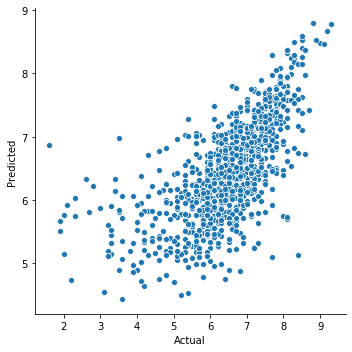

<Figure size 936x720 with 0 Axes>

In [39]:
sns.relplot(x="Actual",y="Predicted",data=df)
plt.figure(figsize=(13,10))

<Figure size 1080x720 with 0 Axes>

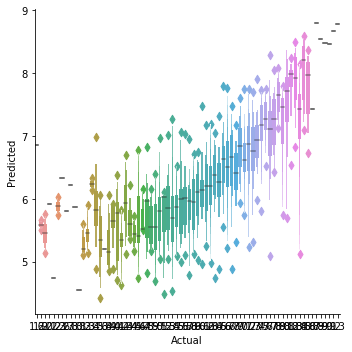

<Figure size 1080x720 with 0 Axes>

In [40]:
sns.catplot(x="Actual",y="Predicted",kind='boxen',data=df)
plt.figure(figsize=(15,10))

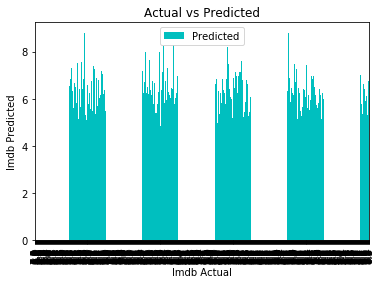

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [41]:
df.plot.bar(x="Actual",y="Predicted",color="c")
plt.title("Actual vs Predicted")
plt.xlabel("Imdb Actual")
plt.ylabel("Imdb Predicted")
plt.show(block=True)
plt.figure(figsize=(15,10))

# Take sample data for plotting for clear identifcation

In [42]:
Selected_data=df.iloc[:50,[0,1]]

<Figure size 1080x720 with 0 Axes>

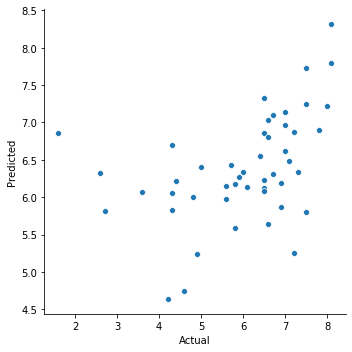

<Figure size 1080x720 with 0 Axes>

In [43]:
sns.relplot(x="Actual",y="Predicted",data=Selected_data)
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

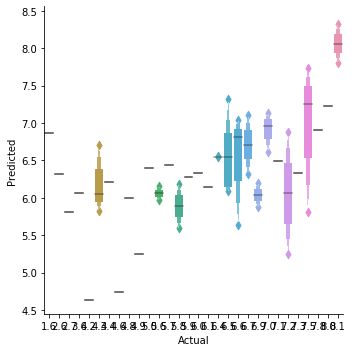

<Figure size 1080x720 with 0 Axes>

In [44]:
sns.catplot(x="Actual",y="Predicted",kind='boxen',data=Selected_data)
plt.figure(figsize=(15,10))

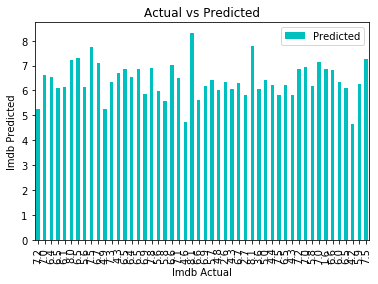

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [45]:
Selected_data.plot.bar(x="Actual",y="Predicted",color="c")
plt.title("Actual vs Predicted")
plt.xlabel("Imdb Actual")
plt.ylabel("Imdb Predicted")
plt.show(block=True)
plt.figure(figsize=(15,10))

In [46]:
from joblib import dump,load
dump(model,'Movie_success_prediction.joblib')


['Movie_success_prediction.joblib']